<a 
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# Lab 6: Sequence-to-sequence models

### Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

### Deliverable:
- Fill in the code for the RNN (using PyTorch's built-in GRU).
- Fill in the training loop
- Fill in the evaluation loop. In this loop, rather than using a validation set, you will sample text from the RNN.
- Implement your own GRU cell.
- Train your RNN on a new domain of text (Star Wars, political speeches, etc. - have fun!)

### Grading Standards:
- 20% Implementation the RNN
- 20% Implementation training loop
- 20% Implementation of evaluation loop
- 20% Implementation of your own GRU cell
- 20% Training of your RNN on a domain of your choice

### Tips:
- Read through all the helper functions, run them, and make sure you understand what they are doing
- At each stage, ask yourself: What should the dimensions of this tensor be? Should its data type be float or int? (int is called `long` in PyTorch)
- Don't apply a softmax inside the RNN if you are using an nn.CrossEntropyLoss (this module already applies a softmax to its input).

### Example Output:
An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) (You will be implementing the decoder, not the encoder, as we are not doing sequence-to-sequence translation.)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [1]:
# Download textfile containing LOTR
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

import unidecode
import string
import random
import re
import pdb
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Parameter
from torch.nn.init import xavier_normal_


device = torch.device("cuda") 

 
all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('./text_files/lotr.txt').read())
file_len = len(file)
print('file_len =', file_len)

--2021-10-19 00:26:03--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 52.44.149.188, 3.221.194.245, 54.86.243.162, ...
Connecting to piazza.com (piazza.com)|52.44.149.188|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2021-10-19 00:26:04--  https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving cdn-uploads.piazza.com (cdn-uploads.piazza.com)... 13.227.40.16, 13.227.40.85, 13.227.40.71, ...
Connecting to cdn-uploads.piazza.com (cdn-uploads.piazza.com)|13.227.40.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===================>]   1.46M  --.-KB/s    

In [2]:
# Takes random 200 characters from the text and we use it to train on

chunk_len = 200
def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]
  
print(random_chunk())

fter a long unpleasant dream that still hovered on the edge 
of memory. Or perhaps he had been ill? But the ceiling looked strange; it 
was flat, and it had dark beams richly carved. He lay a little wh


In [3]:
import torch
# NN can't take in text so we take the string of characters and transform
# it into a vector of longs (long in pytorch is int normally)

# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

# print(char_tensor('abcDEF'))
print(char_tensor('testing this out'))

tensor([29, 14, 28, 29, 18, 23, 16, 94, 29, 17, 18, 28, 94, 24, 30, 29])


---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please do not look at the documentation's code for the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



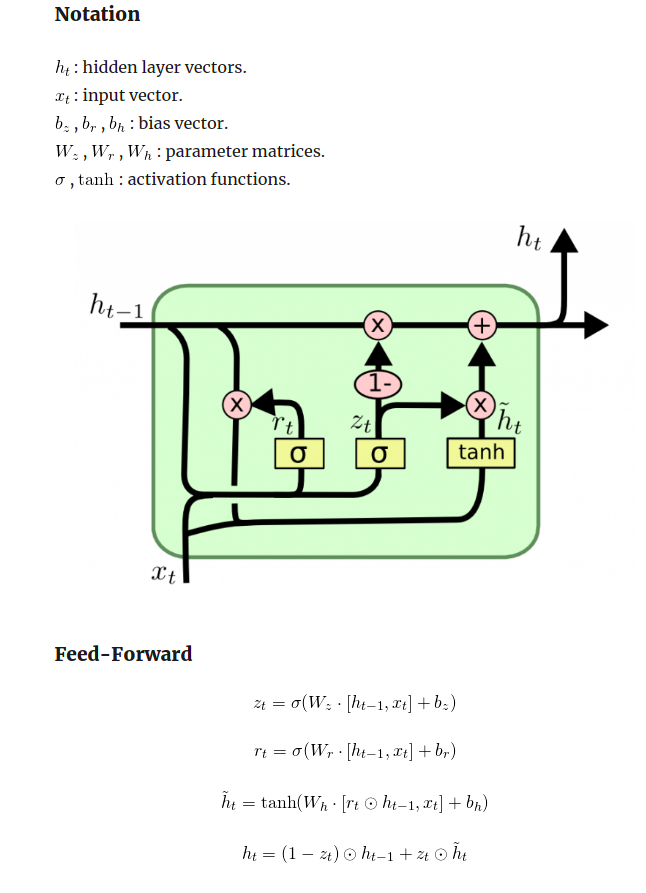

In [39]:
"""
class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    self.W_xr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) 
    self.W_hr = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    self.W_xz = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    self.W_hz = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) 
    self.W_xh = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) 
    self.W_hh = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) 
    self.b_r = 1
    self.b_z = 1
    self.b_h = 1

    # self.w_ir = nn.ModuleList([(nn.Linear(dim0, dim1) for _ in range(num_layers))])
    
  
  def forward(self, inputs, hidden):    
    # r_t = sigmoid(W_ir*x_t + b_ir + W_hr*h_(t-1) + b_hr)
    r_t = self.sigmoid(torch.matmul(inputs, self.W_xr) + torch.matmul(hidden, self.W_hr) + self.b_r)
    # z_t = sigmoid(W_iz*x_t + b_iz + W_hz*h_(t-1) + b_hz)
    z_t = self.sigmoid(torch.matmul(inputs, self.W_xz) + torch.matmul(hidden, self.W_hz) + self.b_z)
    # n_t = tanh(W_in*x_t + b_in + r_t**(W_hn*h_(t-1) + b_hn))
    ht_t = self.tanh(torch.matmul(inputs, self.W_xh) + torch.matmul(r_t * hidden, self.W_hh) + self.b_h)
    # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
    h_t = (z_t * hidden) + ((1 - z_t) * ht_t)
    # If you have a multilatyer GRU you want to concatenate the outputs of the individual cells
    hiddens = hidden #with more layers this would be all of the hidden layers for each t
    # Concatenate hiddens from list
    # pdb.set_trace()
    return h_t, hiddens
"""

In [ ]:
# Backup GRU for 1 Layer
"""
class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    self.W_xr = ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hr = ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_xz = ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hz = ParameterList([Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) for _ in range(num_layers)])
    self.W_xh = ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hh = ParameterList([Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) for _ in range(num_layers)])

    # self.W_xr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    # self.W_hr = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    # self.W_xz = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    # self.W_hz = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    # self.W_xh = Parameter(xavier_normal_(torch.zeros((input_size, hidden_size))))
    # self.W_hh = Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size))))
    
    self.b_r = 1
    self.b_z = 1
    self.b_h = 1

    # self.w_ir = nn.ModuleList([(nn.Linear(dim0, dim1) for _ in range(num_layers))])
    
  
  def forward(self, inputs, hidden):
    # Where ** is hadamard product (not matrix multiplication, but elementwise multiplication)

    # Loop through each layer doing the following computations
    for i in range(self.num_layers):
        
    # r_t = sigmoid(W_ir*x_t + b_ir + W_hr*h_(t-1) + b_hr)
    r_t = self.sigmoid(torch.matmul(inputs, self.W_xr) + torch.matmul(hidden, self.W_hr) + self.b_r)
    # z_t = sigmoid(W_iz*x_t + b_iz + W_hz*h_(t-1) + b_hz)
    z_t = self.sigmoid(torch.matmul(inputs, self.W_xz) + torch.matmul(hidden, self.W_hz) + self.b_z)
    # n_t = tanh(W_in*x_t + b_in + r_t**(W_hn*h_(t-1) + b_hn))
    ht_t = self.tanh(torch.matmul(inputs, self.W_xh) + torch.matmul(r_t * hidden, self.W_hh) + self.b_h)
    # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
    h_t = (z_t * hidden) + ((1 - z_t) * ht_t)
    # If you have a multilatyer GRU you want to concatenate the outputs of the individual cells

    hiddens = hidden #with more layers this would be all of the hidden layers for each t
    return h_t, hiddens
    """

In [4]:
class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    self.W_xr = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hr = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) for _ in range(num_layers)])
    self.W_xz = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hz = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) for _ in range(num_layers)])
    self.W_xh = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((input_size, hidden_size)))) for _ in range(num_layers)])
    self.W_hh = nn.ParameterList([Parameter(xavier_normal_(torch.zeros((hidden_size, hidden_size)))) for _ in range(num_layers)])
    self.b_r = nn.ParameterList([Parameter(torch.tensor([1.0])) for _ in range(num_layers)])
    self.b_z = nn.ParameterList([Parameter(torch.tensor([1.0])) for _ in range(num_layers)])
    self.b_h = nn.ParameterList([Parameter(torch.tensor([1.0])) for _ in range(num_layers)])

    # self.w_ir = nn.ModuleList([(nn.Linear(dim0, dim1) for _ in range(num_layers))])
    
  
  def forward(self, inputs, hidden):
    # Where ** is hadamard product (not matrix multiplication, but elementwise multiplication)

    # hidden.shape (3, 1, 200)
    # split into 3 (1, 1, 200)'s
    hiddens = [hidden[i, :, :] for i in range(self.num_layers)]
    list_hiddens = []
    for i in range(self.num_layers):
        # r_t = sigmoid(W_ir*x_t + b_ir + W_hr*h_(t-1) + b_hr)
        r_t = self.sigmoid(torch.matmul(inputs, self.W_xr[i]) + torch.matmul(hidden, self.W_hr[i]) + self.b_r[i])
        # z_t = sigmoid(W_iz*x_t + b_iz + W_hz*h_(t-1) + b_hz)
        z_t = self.sigmoid(torch.matmul(inputs, self.W_xz[i]) + torch.matmul(hidden, self.W_hz[i]) + self.b_z[i])
        # n_t = tanh(W_in*x_t + b_in + r_t**(W_hn*h_(t-1) + b_hn))
        ht_t = self.tanh(torch.matmul(inputs, self.W_xh[i]) + torch.matmul(r_t * hidden, self.W_hh[i]) + self.b_h[i])
        # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
        h_t = (z_t * hiddens[i]) + ((1 - z_t) * ht_t)
        input = h_t # update input for next layer
        list_hiddens.append(h_t) # create list of new hiddens
        # If you have a multilatyer GRU you want to concatenate the outputs of the individual cells

    # Concatenate hiddens from list

    new_hiddens = torch.cat(list_hiddens, dim=0) # output should be shape([3, 1, 200])
    output = list_hiddens[-1]
    # pdb.set_trace()
    return output, new_hiddens # New hidden layers

---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



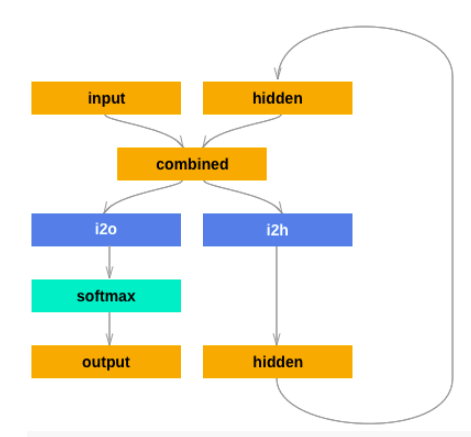

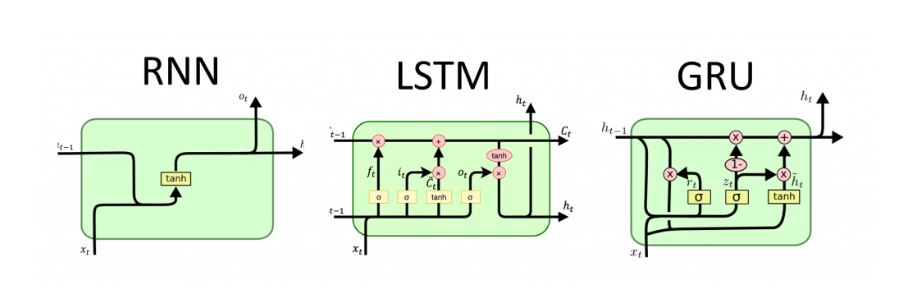

In [5]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    # Create layers of RNN
    # nn.Embedding: Instead of giving it a big one-hot vector, you just give it an index.
    # This index basically is the same as the position of the single 1 in the one-hot vector.
    self.embedding = nn.Embedding(input_size, hidden_size)
    # self.relu = nn.ReLU()
    # set up the GRU passing in number of layers parameter (nn.GRU)
    self.gru = nn.GRU(input_size=hidden_size, hidden_size=hidden_size, num_layers=n_layers)
    # decode the output
    self.out_layer = nn.Linear(hidden_size, output_size)


  def forward(self, input_char, hidden):
    # with torch.autograd.set_detect_anomaly(True):
      # pdb.set_trace()
      embedding = self.embedding(input_char).view(1, 1, -1)
      # Reshape embeddings to fit into gru
      # embedding = embedding.view(1, 1, -1)

      output, hidden = self.gru(embedding, hidden)
      # out_decoded = self.relu(self.out_layer(output))
      out_decoded = self.out_layer(output)
      return out_decoded, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [ ]:
def random_training_set():    
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

random_training_set()

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




In [12]:
# NOTE: decoder_optimizer, decoder, and criterion will be defined below as global variables
n_epochs = 2000
print_every = 200
plot_every = 10
n_layers = 3
lr = 0.001
input_size = n_characters
hidden_size = 200
output_size = n_characters


decoder = RNN(input_size, hidden_size, output_size, n_layers).cuda()
optimizer = torch.optim.Adam(decoder.parameters(), lr=lr) # Model only updates objects discoverable by parameters
loss_criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0
loss_w_epochs = []

def train_RNN(decoder, lr, n_epochs, plot_every, text_file):
    ## initialize hidden layers and variable so it can be updated every itteration.
    total_loss = 0
    # hidden = decoder.init_hidden()


    # n_epochs = 2000
    for epoch in range(1, n_epochs + 1):
        hidden = decoder.init_hidden()
        optimizer.zero_grad()
        input_string, target_string = random_training_set() # EX. hello, ello
        summed_loss = 0
        losses = []
        decoder.train() # Set the model to training mode

        # pdb.set_trace()
        for char, target_char in zip(input_string, target_string):
            out_char, hidden = decoder(char.to(device), hidden.to(device))
            # Fix output character and target character dimensions
            # Unsqeeze to drop dims
            # pdb.set_trace()
            summed_loss = summed_loss + loss_criterion(out_char.squeeze(0).to(device), target_char.unsqueeze(0).to(device))

        avg_loss = summed_loss / len(target_string)
        losses.append(avg_loss)
        summed_loss.backward(retain_graph = True)
        optimizer.step()

        if epoch % print_every == 0:
            print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, avg_loss))
            decoder.eval()
            print(evaluate('Wh', 100), '\n')

        if epoch % plot_every == 0:
            loss_w_epochs.append((range(len(losses)), losses))


train_RNN(decoder, 1e-3, 2000, 200, './text_files/lotr.txt')

[68.73398804664612 (200 10%) 2.3782]
Whap, o
ne faat, to far matreol Gondeake ok ang weis thit Tone gondons the gout kesft a nor theirs em  

[137.82708406448364 (400 20%) 2.0243]
Wh was beer sapot shangor the rorst the I leiming, I of the reack a dalk a len. He fifly then 
ounen p 

[206.47018361091614 (600 30%) 1.8546]
Whe fore to some him the still lell, tooged the kneatle kneast his 
furds the he hand to mind of bet w 

[275.20755648612976 (800 40%) 1.5481]
Whire to to that deel all 
the wan hold and a 

it again till and hong lagorn and leard not or the 
ba 

[344.34220242500305 (1000 50%) 1.6757]
What have semelly of must see. 

'The know-him, and with the gression? 

'No, he souch now he now, and 

[413.4818606376648 (1200 60%) 1.7319]
What it wehe, it his nobor now it of then honhous now the hirting their resteld over a sabece.' 

'It  

[482.0787672996521 (1400 70%) 1.5451]
Whe dead a, 'I hold 
a villow the alferty gliem there that you round now a the siles stoor at the mill 


---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



Temperature takes our distribution and makes it flatter so we can have more random variance in our outputs. 0 being the same string everytime, 1 being most random.

In [8]:
def sample_outputs(output, temperature):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    # As temperature approaches 0, this sampling function becomes argmax (no randomness)
    # As temperature approaches infinity, this sampling function becomes a purely random choice
    # pdb.set_trace()
    return torch.multinomial(torch.exp(output / temperature), 1)

def evaluate(prime_str='A', predict_len=100, temperature=0.8):
  ## initialize hidden state, initialize other useful variables
    # pdb.set_trace()
    hidden = decoder.init_hidden()
    # char_tensor Turns string into list of longs
    input_str = char_tensor(prime_str)
    # Get the best hidden state we can given our prime_str
    # pdb.set_trace()
    # Pass in each letter in input_str through model to get hidden state after each
    for i in range(len(input_str) - 1):
        # Combine input with previous hidden state 
        # _, hidden = decoder(input_str[i].to(device), hidden.to(device))
        _, hidden = decoder(input_str[i].to(device), hidden.to(device))
    # pdb.set_trace()
    eval_input = input_str[-1] # Get last character

    # Start off prediction with input string 'prime_str'
    generated_string = prime_str
    # Generate futrue characters by sampling fomr the output vector
    for char in range(predict_len):
        # out, hidden = decoder(eval_input.to(device), hidden.to(device))
        out, hidden = decoder(eval_input.to(device), hidden.to(device))

        generated_char_idx = sample_outputs(out.squeeze(0), temperature)
        generated_char = all_characters[generated_char_idx]
        # Build up generated string
        generated_string += generated_char

        # Turn generated char into torch.long (int) for next interation
        # pdb.set_trace()
        eval_input = char_tensor(generated_char)

    return generated_string

  ## /
  

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---


**TODO:** 
* Create some cool output

**DONE:**




Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs. These are the results, along with the prime string:

---

 G:
 
 Gandalf was decrond. 
'All have lord you. Forward the road at least walk this is stuff, and 
went to the long grey housel-winding and kindled side was a sleep pleasuring, I do long 
row hrough. In  

 lo:
 
 lost death it. 
'The last of the gatherings and take you,' said Aragorn, shining out of the Gate. 
'Yes, as you there were remembaused to seen their pass, when? What 
said here, such seven an the sear 

 lo:
 
 low, and frod to keepn 
Came of their most. But here priced doubtless to an Sam up is 
masters; he left hor as they are looked. And he could now the long to stout in the right fro horseless of 
the like 

 I:
 
 I had been the 
in his eyes with the perushed to lest, if then only the ring and the legended 
of the less of the long they which as the 
enders of Orcovered and smood, and the p 

 I:
 
 I they were not the lord of the hoomes. 
Home already well from the Elves. And he sat strength, and we 
housed out of the good of the days to the mountains from his perith. 

'Yess! Where though as if  

 Th:
 
 There yarden 
you would guard the hoor might. Far and then may was 
croties, too began to see the drumbred many line 
and was then hoard walk and they heart, and the chair of the 
Ents of way, might was 

 G:
 
 Gandalf 
been lat of less the round of the stump; both and seemed to the trees and perished they 
lay are speered the less; and the wind the steep and have to she 
precious. There was in the oonly went 

 wh:
 
 which went out of the door. 
Hull the King and of the The days of his brodo 
stumbler of the windard was a thing there, then it been shining langing 
to him poor land. They hands; though they seemed ou 

 ra:
 
 rather,' have all the least deather 
down of the truven beginning to the house of sunk. 
'Nark shorts of the Eyes of the Gate your great nothing as Eret. 
'I wander trust horn, and there were not, it  

 I:
 
 I can have no mind 
together! Where don't may had one may little blung 
terrible to tales. And turn and Gandalf shall be not to as only the Cattring 
not stopped great the out them forms. On they she lo 

---


In [13]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 lo
 long the shaze,' said Gandalf.' 

Saruman of the Elves of Morcal by the tarked to the came cannot time and beal north. But had scared to am courtill to as could for the lates of the last down more has b 

 lo
 loud the stood lose, and if looked 
and and back 
much of the 
knead, but the great 
then the hill and stricked or spoked to getter his many farrow that seen the feots of him, wat 
and there recear,' sa 

 Th
 Then 
back the trank of Gondor then now in the airsel, then into the riding come 
of ser and nothing the trees country, these came more to while at the road to the taln, would be the did now at the antu 

 ca
 care up. But then he dark 
would the shilled up of words the 
men of Mordor of Muria-some. The Countainsward and walk. Hold many would be put nor the king wance to the hard and return the Sam. Trust poi 

 G
 Gandalf susped 
in the waters and find on the hulls, he was you come of the cill lord. He have folk that 
were bore lide entery of the coursen brown 
back t

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**



In [22]:
file = unidecode.unidecode(open('./text_files/hp1.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 475314


In [23]:
# NOTE: decoder_optimizer, decoder, and criterion will be defined below as global variables
n_epochs = 2000
print_every = 200
plot_every = 10
n_layers = 3
lr = 0.001
input_size = n_characters
hidden_size = 200
output_size = n_characters


decoder = RNN(input_size, hidden_size, output_size, n_layers).cuda()
optimizer = torch.optim.Adam(decoder.parameters(), lr=lr) # Model only updates objects discoverable by parameters
loss_criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0
loss_w_epochs = []


# Train Model with new text file
train_RNN(decoder, 1e-3, 2000, 200, './text_files/hp1.txt')

[70.43221354484558 (200 10%) 2.4074]
Whey the areoy gow wed int meelander. 
| Hary thir the shomed on 
the on lemey coutte'dinm. Dovenly na 

[140.60947251319885 (400 20%) 1.6463]
Whoot the becs was hey Nowritto om the the courly. 

"We, exaw knot but 
thave doon, 
got lang Stoned  

[210.74839973449707 (600 30%) 1.6682]
Whing a bassed. 

"I bet ousing any the see mrianring of they 
agalls had had bear and younst and the  

[281.05773878097534 (800 40%) 1.7650]
Whe night 
as bapen. 

Harry son's for tall becan arounsion. Harry. 

"Per man too 
rane's 
the 
to pr 

[351.0445284843445 (1000 50%) 1.5466]
Where grade how the me, and the troucky grays and the from of a sounk timgh and he 
wasre to keen to s 

[420.8909924030304 (1200 60%) 1.7955]
What out of sead. "I knows sophers Stone -- every's from horre's for anything the chold, they new all  

[490.40593457221985 (1400 70%) 1.6724]
When have to that belponting of 
corroress, the Philosophers Stince it went 
that himself Norked. 

"P 


In [24]:
# Generate
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 ca
 carest, 
the holl what he was snout on bill, Mr. Ollivandy 
and Dudley sound on then he stared them about to the think yeh 
night at the much to go to climked the door. 



Page | 244 Harry Potter and t 

 Th
 That cloaks 
vand a liut of the claphed them a feets. 

"But the'd letter Cuamh beloss anythin' hever door. 

"I somelves ever pointy bown scar. Ron from be and the 
that see. So don't take it?" 

"So o 

 I 
 I and the worrie last of him 
under more and the storied made that anything a fleam of going and 
through the troll for sill four. He not left hand of the ter if and a look of 
the scoupted to go the to 

 wh
 what hilped some 
think it is don't the around a notch along crowd again. 



"They're turned on themic. 

"At you're -- you've think Ficking anythin' oncorate, which hundred at 
the glain, and Hermione 

 he
 he that was a Scanly and 
feat lasting flansted the dads wand to slipped so did his 
twip an' a cormon a slipping on them, a might cloak, but 
the ends. "R